# Analysis and Prediction-Indian Liver Patients.

In [475]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Data Analysis

In [476]:
#Read the training & test data
liver_df = pd.read_csv('../input/indian_liver_patient.csv')

In [477]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [478]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:   
1) Only gender is non-numeric veriable. All others are numeric.   
2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 2 indicates the patient does not have liver disease.  

In [479]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [480]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null.Replace null values by mean

In [481]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [482]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].median())

Look for duplicates and drop it

In [483]:
liver_df.duplicated().sum()

13

In [484]:
liver_df=liver_df.drop_duplicates()

# Data Visualization

Number of patients diagnosed with liver disease:  406
Number of patients not diagnosed with liver disease:  164


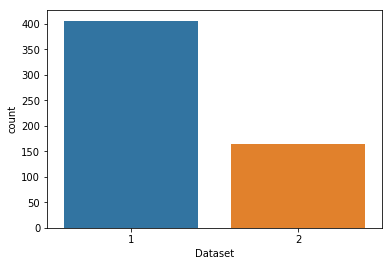

In [485]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  430
Number of patients that are female:  140


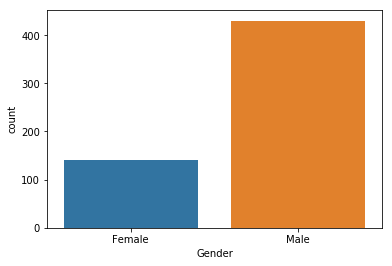

In [486]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [487]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.836735
3,2,Male,40.678261
0,1,Female,43.384615
1,1,Male,47.107937


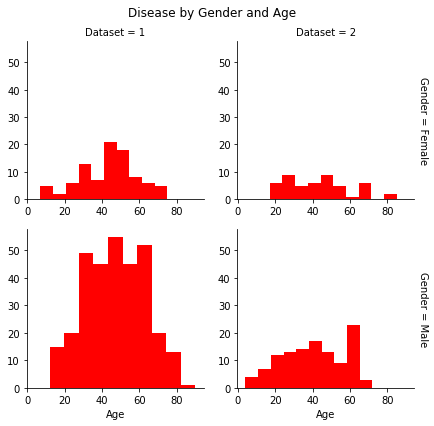

In [488]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

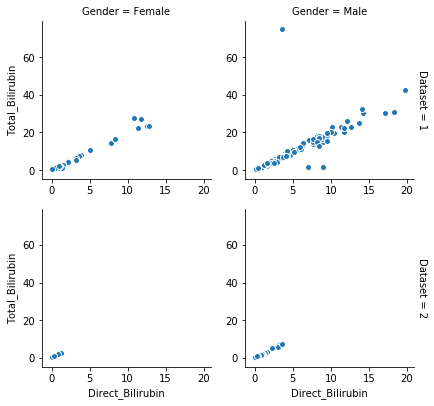

In [489]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

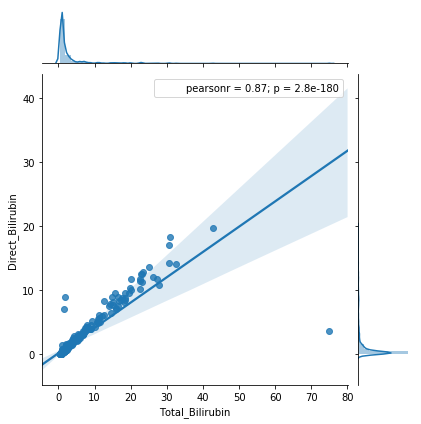

In [490]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

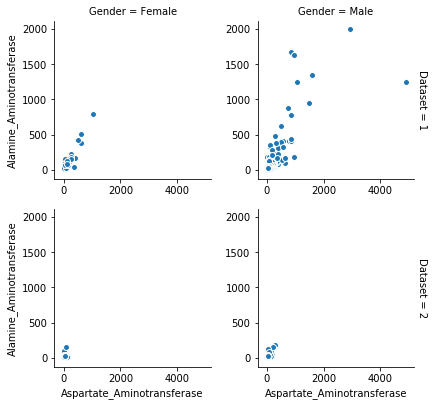

In [491]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

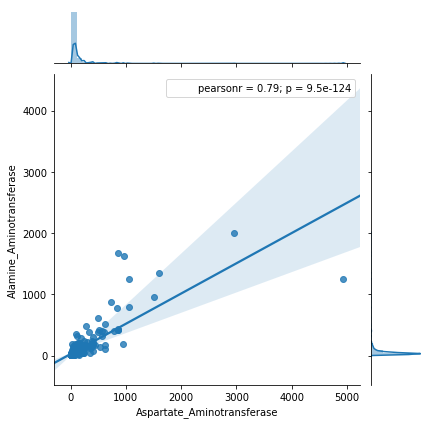

In [492]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

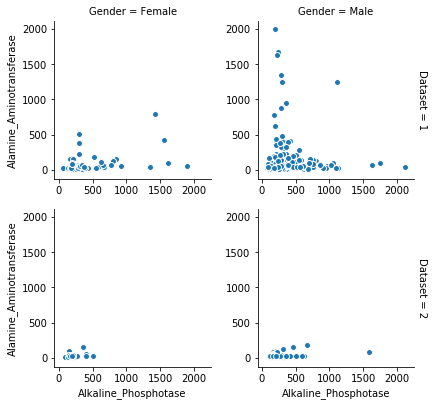

In [493]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

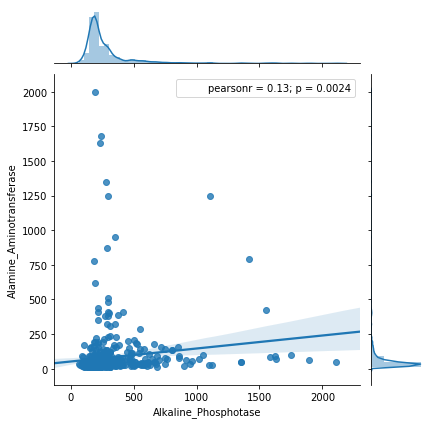

In [494]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

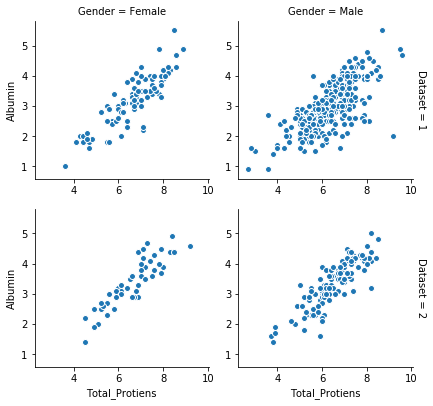

In [495]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

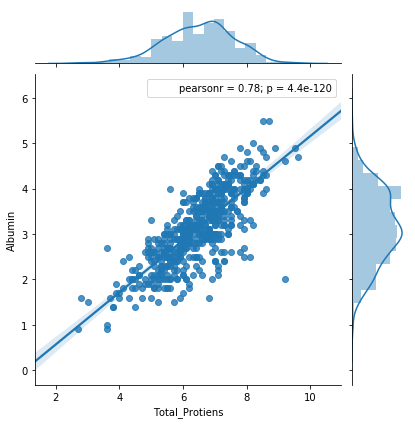

In [496]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

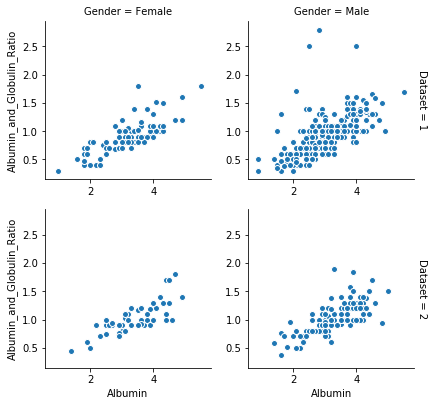

In [497]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

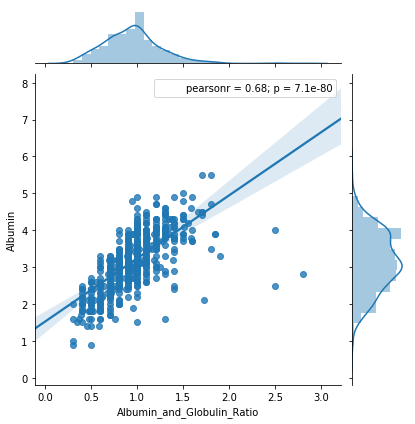

In [498]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

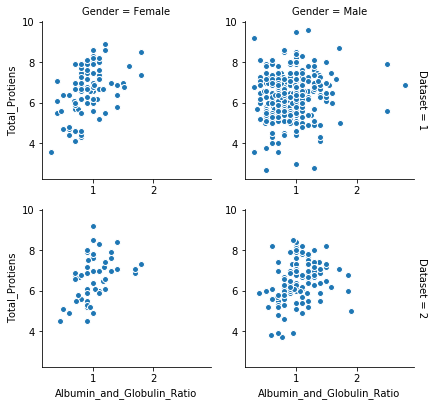

In [499]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

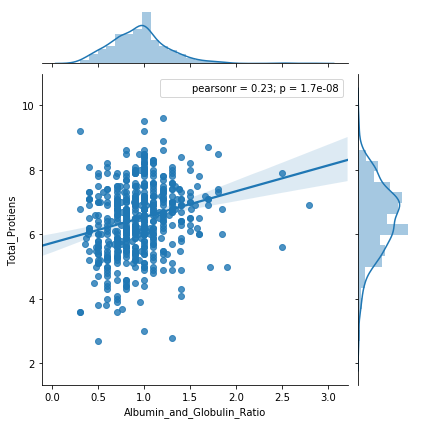

In [500]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Total_Protiens", data=liver_df, kind="reg")

# Observation:

From the above jointplots and scatterplots, we find direct relationship between the following features:  
Direct_Bilirubin & Total_Bilirubin  
Aspartate_Aminotransferase & Alamine_Aminotransferase  
Total_Protiens & Albumin  
Albumin_and_Globulin_Ratio & Albumin  

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:  
Total_Bilirubin  
Alamine_Aminotransferase  
Total_Protiens  
Albumin_and_Globulin_Ratio  
<!-- Albumin   -->

In [501]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


Convert categorical variable "Gender" to categories

In [502]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the categorical column 'Gender'
liver_df['Gender'] = le.fit_transform(liver_df['Gender'])

In [503]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [504]:
liver_df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,0.754386,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.947997,1.287719
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318510,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [630]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = liver_df.drop(['Dataset'], axis=1)
X.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89


In [631]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [632]:
# Correlation
liver_corr = X.corr()

In [633]:
liver_corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.058237,0.011500,0.007050,0.081673,-0.083383,-0.016753,-0.197052,-0.271170,-0.215633
Gender,0.058237,1.000000,0.090298,0.101730,-0.023014,0.084317,0.081497,-0.085895,-0.091369,-0.005566
Total_Bilirubin,0.011500,0.090298,1.000000,0.874116,0.206239,0.217471,0.238678,-0.008588,-0.224124,-0.207621
Direct_Bilirubin,0.007050,0.101730,0.874116,1.000000,0.234609,0.237450,0.258489,-0.000875,-0.230751,-0.201386
Alkaline_Phosphotase,0.081673,-0.023014,0.206239,0.234609,1.000000,0.126830,0.167230,-0.030048,-0.168318,-0.236028
Alamine_Aminotransferase,-0.083383,0.084317,0.217471,0.237450,0.126830,1.000000,0.791857,-0.035193,-0.027973,-0.006516
Aspartate_Aminotransferase,-0.016753,0.081497,0.238678,0.258489,0.167230,0.791857,1.000000,-0.022000,-0.085180,-0.072877
Total_Protiens,-0.197052,-0.085895,-0.008588,-0.000875,-0.030048,-0.035193,-0.022000,1.000000,0.784731,0.233576
Albumin,-0.271170,-0.091369,-0.224124,-0.230751,-0.168318,-0.027973,-0.085180,0.784731,1.000000,0.684087
Albumin_and_Globulin_Ratio,-0.215633,-0.005566,-0.207621,-0.201386,-0.236028,-0.006516,-0.072877,0.233576,0.684087,1.000000


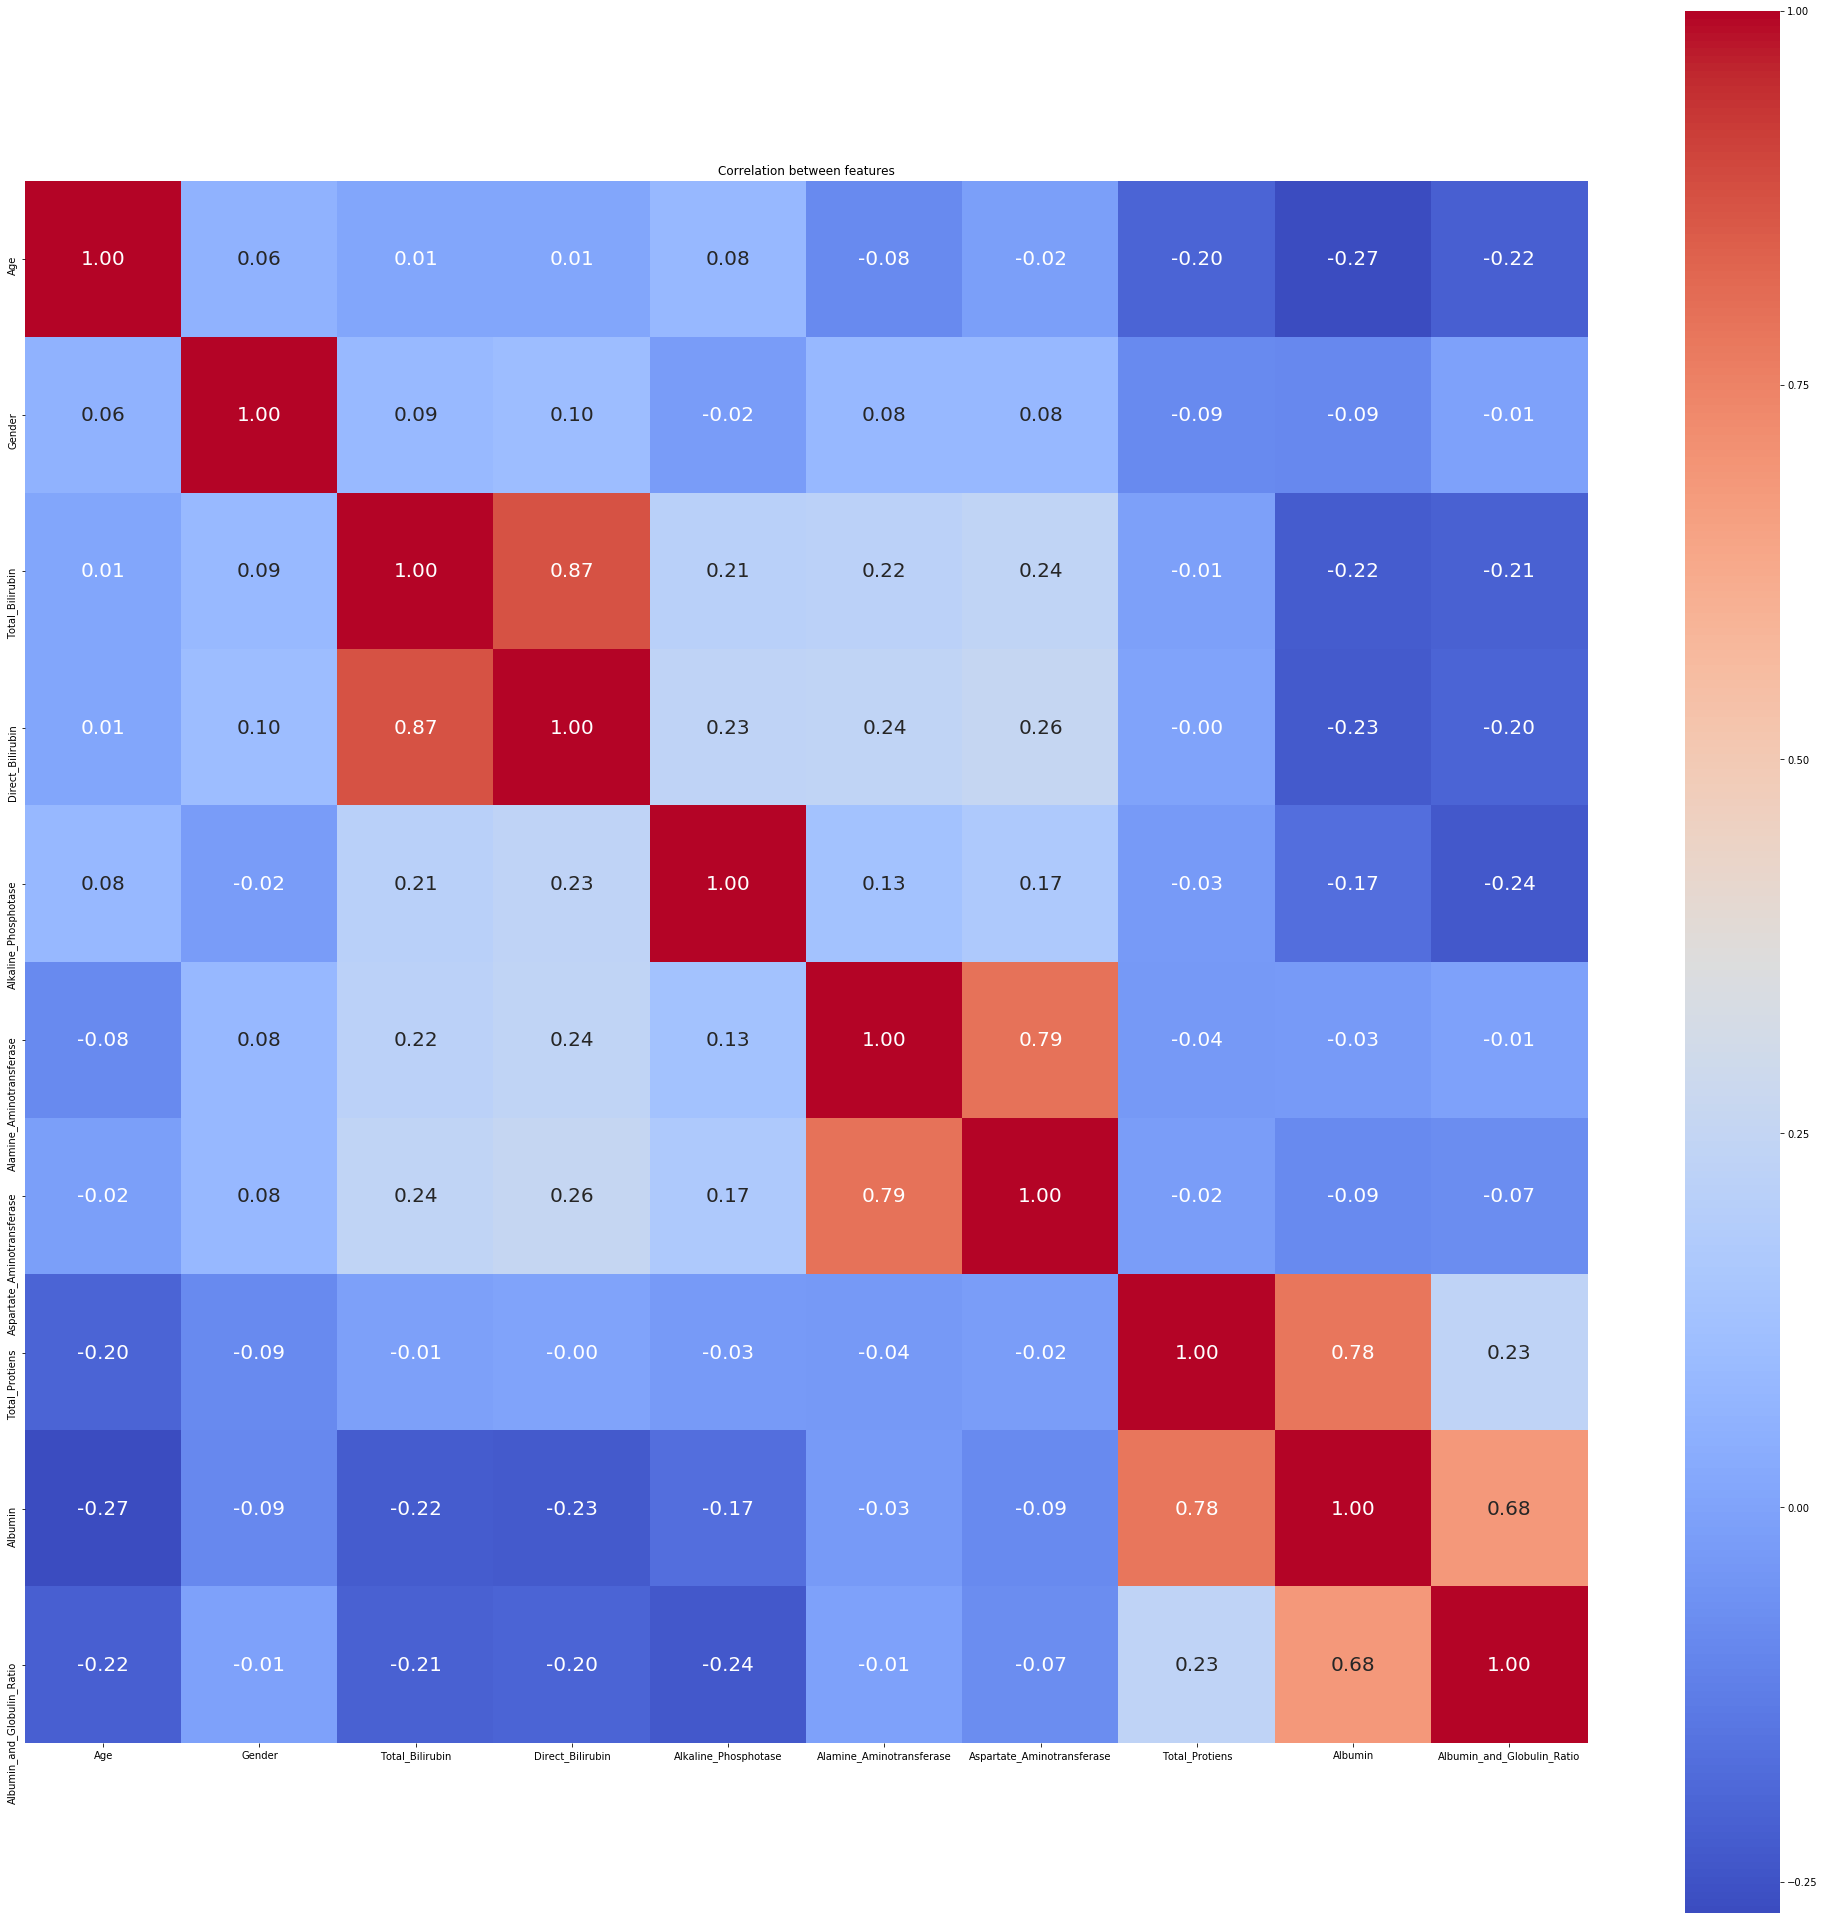

In [634]:
plt.figure(figsize=(35, 35))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 20},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [510]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

# Machine Learning

In [635]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [636]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [637]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(399, 10)
(399,)
(171, 10)
(171,)


In [638]:
X_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
452,58,1,0.9,0.2,1100,25,36,7.1,3.5,0.9
404,22,1,0.8,0.2,198,20,26,6.8,3.9,1.3
96,39,1,3.8,1.5,298,102,630,7.1,3.3,0.8
515,49,1,3.9,2.1,189,65,181,6.9,3.0,0.7
341,36,0,0.8,0.2,650,70,138,6.6,3.1,0.8


Logistic Regression Training Score: 
 72.43
Logistic Regression Test Score: 
 72.51
Coefficient: 
 [[-0.01568284  0.19893449 -0.19593395 -0.4758402  -0.00112145 -0.00842706
  -0.00333175 -0.04742818  0.28456021 -0.06481817]]
Intercept: 
 [ 0.4999256]
Accuracy: 
 0.72514619883
Confusion Matrix: 
 [[113   5]
 [ 42  11]]
Classification Report: 
              precision    recall  f1-score   support

          1       0.73      0.96      0.83       118
          2       0.69      0.21      0.32        53

avg / total       0.72      0.73      0.67       171



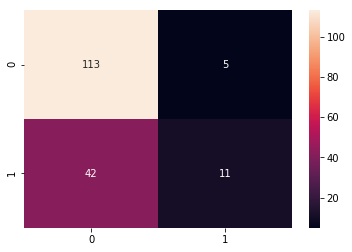

In [639]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [640]:
from sklearn.metrics import confusion_matrix

tp, fp, fn, tn = confusion_matrix(y_test, log_predicted).ravel()

print("True Positive:", tp)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tn)

sensitivity = tp / (tp + fn)

print("Sensitivity:", sensitivity)

True Positive: 113
False Positive: 5
False Negative: 42
True Positive: 11
Sensitivity: 0.729032258065


In [662]:
X = liver_df.drop(['Direct_Bilirubin','Aspartate_Aminotransferase','Albumin','Dataset'], axis=1)
X.head(3)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
0,65,0,0.7,187,16,6.8,0.90
1,62,1,10.9,699,64,7.5,0.74
2,62,1,7.3,490,60,7.0,0.89


In [663]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(399, 7)
(399,)
(171, 7)
(171,)


Logistic Regression Training Score: 
 72.93
Logistic Regression Test Score: 
 71.93
Coefficient: 
 [[-0.01571482  0.19858193 -0.47475497 -0.00118656 -0.01157341  0.10237454
   0.27327366]]
Intercept: 
 [ 0.22238928]
Accuracy: 
 0.719298245614
Confusion Matrix: 
 [[114   4]
 [ 44   9]]
Classification Report: 
              precision    recall  f1-score   support

          1       0.72      0.97      0.83       118
          2       0.69      0.17      0.27        53

avg / total       0.71      0.72      0.65       171



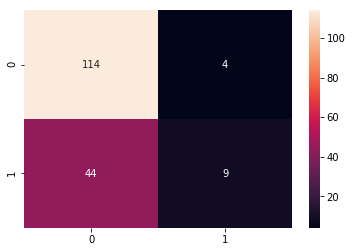

In [664]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))

print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


In [665]:
from sklearn.metrics import confusion_matrix

tp, fp, fn, tn = confusion_matrix(y_test, log_predicted).ravel()

print("True Positive:", tp)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Negative:", tn)

sensitivity = tp / (tp + fn)

print("Sensitivity:", sensitivity)

True Positive: 114
False Positive: 4
False Negative: 44
True Negative: 9
Sensitivity: 0.721518987342


## Use SMOTE to balance the data

In [645]:
X['Gender'] = X['Gender'].astype('category')

In [646]:
X.dtypes

Age                              int64
Gender                        category
Total_Bilirubin                float64
Alkaline_Phosphotase             int64
Alamine_Aminotransferase         int64
Total_Protiens                 float64
Albumin                        float64
Albumin_and_Globulin_Ratio     float64
dtype: object

In [647]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [648]:
x_smote, y_smote = smote.fit_sample(X,y)

In [649]:
from collections import Counter  ## counter no.of label for feature
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 406, 2: 164})
SMOTE Classes Counter({1: 406, 2: 406})


In [650]:
X.columns 

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [651]:
x_smote = pd.DataFrame(x_smote)

In [652]:
x_smote.columns = X.columns

In [653]:
x_smote['Gender'] = x_smote['Gender'].apply(lambda x: 1 if x > 0.5 else 0)

In [654]:
x_smote.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65.0,0,0.7,187.0,16.0,6.8,3.3,0.90
1,62.0,1,10.9,699.0,64.0,7.5,3.2,0.74
2,62.0,1,7.3,490.0,60.0,7.0,3.3,0.89
3,58.0,1,1.0,182.0,14.0,6.8,3.4,1.00
4,72.0,1,3.9,195.0,27.0,7.3,2.4,0.40


In [655]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.25,random_state=42)

Logistic Regression Training Score: 
 70.61
Logistic Regression Test Score: 
 73.4
Coefficient: 
 [[-0.01005159  0.10808493 -0.33991928 -0.00094484 -0.01267179 -0.24539965
   0.51429966  0.1832866 ]]
Intercept: 
 [ 1.46872258]
Accuracy: 
 0.733990147783
Confusion Matrix: 
 [[52 41]
 [13 97]]
Classification Report: 
              precision    recall  f1-score   support

          1       0.80      0.56      0.66        93
          2       0.70      0.88      0.78       110

avg / total       0.75      0.73      0.73       203



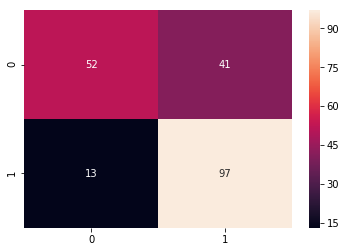

In [656]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


In [657]:
from sklearn.metrics import confusion_matrix

tp, fp, fn, tn = confusion_matrix(y_test, log_predicted).ravel()

print("True Positive:", tp)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Negative:", tn)

sensitivity = tp / (tp + fn)

print("Sensitivity:", sensitivity)

True Positive: 52
False Positive: 41
False Negative: 13
True Negative: 97
Sensitivity: 0.8


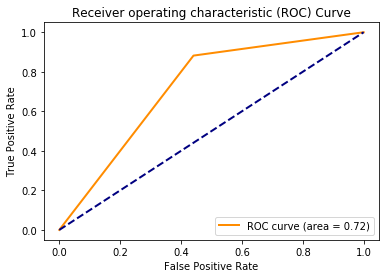

In [659]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test,log_predicted)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()